<h1>Logistic Regression with Python - Part 1</h1>

Logistic Regression is used for finding the classification (categories) output

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_c301c8e200a34ae486a32a40454568f1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='D3_G27FYSAYWOwELXqebZnpnv235igW_eE9duzj2TzyD',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c301c8e200a34ae486a32a40454568f1.get_object(Bucket='basicdataprocessingvisualizationp-donotdelete-pr-segj2b6ymcjjwc',Key='titanic_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Verify if data is missing or not via Boolean expression

In [5]:
# .isnull() checks to see if data is missing
# False means data is NOT missing (or non NaN)
# True means data IS missing or there is a NaN

train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


Create a heatmap to see where data is missing

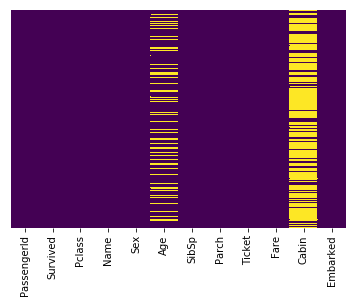

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# The Yellow indicates isnull is TRUE. Meaning, there are null or NaN values
# The purple indicates isnull is FALSE, where as there aren't null or NaN values
# Therefore, the 'Age' and 'Cabin' labels (categories) have ALOT of NaN/null values

<h3>More Exploratory Data Analysis</h3>

In [8]:
sns.set_style('whitegrid')

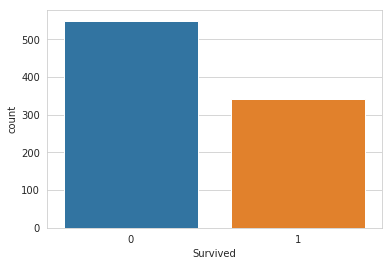

In [10]:
# Get a count of those who did and did not survive 

sns.countplot(x='Survived', data=train)

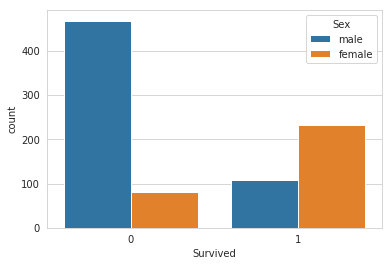

In [13]:
# Break down survival/non-survival based on gender (using hue='sex')

sns.countplot(x='Survived', hue='Sex', data=train)

In [ ]:
# There were more male non-survivors, and twice as many female survivors, based on the above output.